In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('energydata_complete.csv', parse_dates=['date'])
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
scaler = MinMaxScaler()
to_scale = data.drop(['date', 'lights'], axis=1)
normalised_data = pd.DataFrame(scaler.fit_transform(to_scale), columns=to_scale.columns)

In [54]:
X = normalised_data.join(data[['date', 'lights']])

In [55]:
X['Year'] = X['date'].apply(lambda x: x.year)
X['Month'] = X['date'].apply(lambda x: x.month)
X['Day'] = X['date'].apply(lambda x: x.day)
X['Hour'] = X['date'].apply(lambda x: x.hour)
X['Minute'] = X['date'].apply(lambda x: x.minute)

In [56]:
X.drop(['date', 'Appliances'], inplace=True, axis=1)

In [57]:
X.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,lights,Year,Month,Day,Hour,Minute
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449,30,2016,1,11,17,0
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083,30,2016,1,11,17,10
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848,30,2016,1,11,17,20
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261,40,2016,1,11,17,30
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611,40,2016,1,11,17,40


In [58]:
y = normalised_data['Appliances']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<AxesSubplot:xlabel='T2', ylabel='T6'>

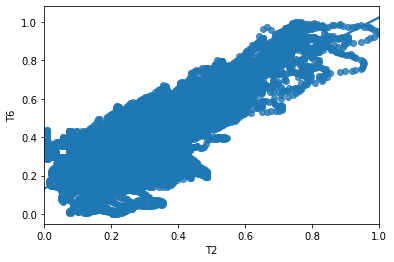

In [79]:
living_room_temp = np.array(x_train.iloc[:,3])
outside_temp = np.array(x_train.iloc[:,11])

sns.regplot(x='T2', y='T6', data=X)

In [62]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [63]:
pred = model.predict(x_test)

In [83]:
mae = mean_absolute_error(y_test, pred) 
print('Mean Absolute error: {:.2f}'.format(mae))

Mean Absolute error: 0.05


In [84]:
rss = ((y_test - pred)**2).sum()
print('Residual sum of squares: {:.2f}'.format(rss))

Residual sum of squares: 44.23


In [87]:
rmse = np.sqrt(mean_squared_error(y_test, pred) )
print('Root mean squared error: {:.3f}'.format(rmse))

Root mean squared error: 0.086


In [86]:
R_square = r2_score(y_test, pred) 
print('Coefficient of determination: {:.2f}'.format(R_square))

Coefficient of determination: 0.17


In [80]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name] = weights_df[col_name].round(3)
    
    return weights_df

In [81]:
model_weights = get_weights_df(model, x_train, "Linear model")
print(model_weights)

       Features  Linear model
0          RH_2        -0.416
1         T_out        -0.233
2            T2        -0.211
3          RH_8        -0.094
4            T9        -0.070
5          RH_4        -0.041
6            T1        -0.037
7            T4        -0.035
8          RH_7        -0.035
9        RH_out        -0.031
10         RH_9        -0.022
11           T5        -0.016
12        Month        -0.013
13          Day        -0.000
14         Year         0.000
15       Minute         0.000
16         Hour         0.001
17          rv1         0.001
18          rv2         0.001
19       lights         0.002
20         RH_5         0.004
21           T7         0.006
22         RH_6         0.009
23  Press_mm_hg         0.009
24   Visibility         0.010
25    Windspeed         0.020
26    Tdewpoint         0.070
27           T8         0.075
28         RH_3         0.075
29           T6         0.217
30           T3         0.314
31         RH_1         0.500


In [71]:
ridge_model = Ridge(alpha=0.4)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.4)

In [72]:
ridge_pred = ridge_model.predict(x_test)

In [73]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print('{:.2f}'.format(ridge_rmse))

0.09


In [74]:
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.001)

In [82]:
lasso_weights = get_weights_df(lasso_model, x_train, "Lasso Model")
print(lasso_weights)

       Features  Lasso Model
0        RH_out       -0.025
1         Month       -0.001
2            T1       -0.000
3          Year        0.000
4           rv2        0.000
5           rv1        0.000
6     Tdewpoint        0.000
7    Visibility        0.000
8     Windspeed        0.000
9   Press_mm_hg       -0.000
10        T_out        0.000
11         RH_9        0.000
12           T9        0.000
13           T8        0.000
14         RH_8       -0.000
15         RH_3        0.000
16           T7        0.000
17         RH_6       -0.000
18         RH_5       -0.000
19           T5       -0.000
20         RH_4        0.000
21           T4       -0.000
22         RH_7       -0.000
23         RH_1        0.000
24         RH_2       -0.000
25           T2        0.000
26          Day        0.000
27       Minute        0.000
28           T6        0.000
29       lights        0.002
30         Hour        0.002
31           T3        0.015


In [77]:
lasso_pred = lasso_model.predict(x_test)

In [88]:
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print('Lasso root mean squared error: {:.3f}'.format(lasso_rmse))

Lasso root mean squared error: 0.091
